In [1]:
import sys
import warnings
warnings.filterwarnings('ignore')
import joblib
import copy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
import os

PRJ_DIR = os.path.abspath('')

np.random.seed(42)

In [3]:
data = pd.read_csv('/content/data.csv')
data.sample(10)

,minute,half,ht_elo,at_elo,ht_goal,at_goal,pass,final_3rd_pass,key_pass,corner,big_chance,shot,red,result
10876,26,1,1866.600830,1659.690308,0,0,89,60,5,3,0,5,0,W
13205,65,2,1642.010620,1759.335083,1,0,-120,-41,-1,1,-2,2,0,W
1862,76,2,1800.702393,2012.692627,0,1,-211,-140,-10,-4,0,-18,0,L
2699,33,1,1645.036621,1955.124268,0,0,-229,-31,-1,-1,-1,-1,0,L
18192,5,1,1725.790527,1688.760010,0,0,31,6,0,0,0,0,0,D
18474,83,2,1667.053711,2082.443359,3,0,-345,-75,7,-2,4,9,0,W
8404,25,1,1724.459351,1626.234741,1,1,71,33,1,1,0,0,0,D
17592,3,1,1633.255493,1643.919189,0,0,-12,-4,-1,-1,0,-1,0,W
13107,68,2,1739.280640,1853.246338,1,0,173,56,7,5,1,7,0,W
8658,81,2,1921.614380,1576.348022,2,0,413,100,9,2,4,12,0,W


In [6]:
x = data.drop(['result'], axis = 1)
y = data['result']
x = x.values
y = y.values

In [7]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
scaler = StandardScaler()
x = scaler.fit_transform(x)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [16]:
def save_model(model, name, folder_path):
    joblib.dump(model, os.path.join(folder_path, name + ".pkl"))
    print("Saved model", name)
def load_model(path, name):
    return joblib.load(path, name)
    print("Loaded model", name)

In [12]:
def rps_score(outcomes, predictions):
  loss = 0
  for i, p in enumerate(predictions):
    outcome = [1 if x == outcomes[i] else 0 for x in range(3)]
    tmp = probs = outs = 0
    for j, val in enumerate(predictions[i]):
      probs += val
      outs += outcome[j]
      tmp += (probs - outs) ** 2
    loss += tmp / 2
  loss /= len(predictions)
  return 1 - loss

In [37]:
result = {}
best_score = 0
best_model = 0

In [38]:
def evaluate(model):
  global best_score, best_model
  predictions = model.predict_proba(x)
  score = rps_score(y, predictions)
  print(model.__class__.__name__, 'Ranked Probability Score:', score)
  result[model.__class__.__name__] = score
  if score > best_score:
    best_model = model
    best_score = score

In [39]:
folder_path = '/content/model'

In [40]:
for model_path in os.listdir(folder_path):
  model = load_model(os.path.join(folder_path, model_path))
  evaluate(model)

KNeighborsClassifier Ranked Probability Score: 0.950055453480321
DecisionTreeClassifier Ranked Probability Score: 0.8362803590843452
XGBClassifier Ranked Probability Score: 0.8295118551412131
RandomForestClassifier Ranked Probability Score: 0.8806648011392662


In [50]:
print('Model with the best performance on test dataset:')
print(best_model)
print(best_score)

Model with the best performance on test dataset:
KNeighborsClassifier(metric='manhattan', n_neighbors=20)
0.950055453480321


In [51]:
save_model(best_model, 'best_model', folder_path)

Saved model best_model


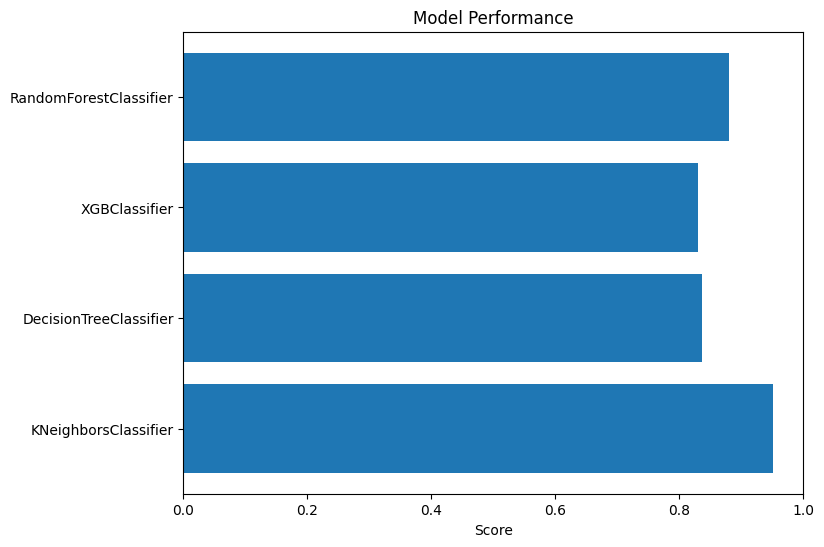

In [47]:
classifiers = list(result.keys())
scores = list(result.values())

plt.figure(figsize=(8, 6))
plt.barh(classifiers, scores)
plt.xlabel('Score')
plt.title('Model Performance')
plt.xlim(0, 1)
plt.show()